# DIABETES PREDICTION



### Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("pastel")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from pickle import dump

### Loading The Dataset

#### Displaying the top 10 rows of the dataset

In [2]:
df = pd.read_csv("diabetes_data_upload.csv")
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


### Exploratory Data Analysis

In [3]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
df["class"].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

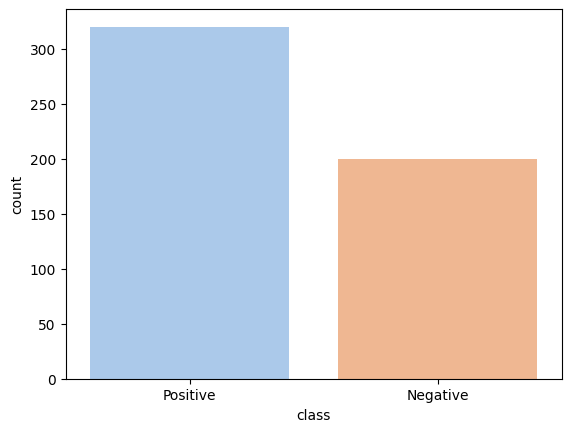

In [6]:
sns.countplot(x = 'class',data = df)

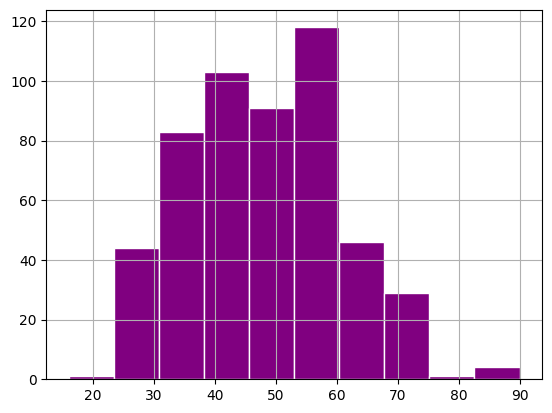

In [7]:
df["Age"].hist(color ="purple" ,edgecolor = "white",);

In [8]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 90 Min Age: 16


### Data Preprocessing

In [9]:
df.isnull().head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [11]:
df_copy = df.copy(deep = True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_copy['Gender'])
label2 = le.fit_transform(df_copy['Polyuria'])
label3 = le.fit_transform(df_copy['Polydipsia'])
label4 = le.fit_transform(df_copy['sudden weight loss'])
label5 = le.fit_transform(df_copy['weakness'])
label6 = le.fit_transform(df_copy['Polyphagia'])
label7 = le.fit_transform(df_copy['Genital thrush'])
label8 = le.fit_transform(df_copy['visual blurring'])
label9 = le.fit_transform(df_copy['Itching'])
label10 = le.fit_transform(df_copy['Irritability'])
label11 = le.fit_transform(df_copy['delayed healing'])
label12 = le.fit_transform(df_copy['partial paresis'])
label13 = le.fit_transform(df_copy['muscle stiffness'])
label14 = le.fit_transform(df_copy['Alopecia'])
label15 = le.fit_transform(df_copy['Obesity'])
label16 = le.fit_transform(df_copy['class'])

In [12]:
df_copy.drop("Gender", axis=1, inplace=True)
df_copy["Gender"] = label
df_copy.drop("Polyuria", axis=1, inplace=True)
df_copy["Polyuria"] = label2
df_copy.drop("Polydipsia", axis=1, inplace=True)
df_copy["Polydipsia"] = label3
df_copy.drop("sudden weight loss", axis=1, inplace=True)
df_copy["sudden weight loss"] = label4
df_copy.drop("weakness", axis=1, inplace=True)
df_copy["weakness"] = label5
df_copy.drop("Polyphagia", axis=1, inplace=True)
df_copy["Polyphagia"] = label6
df_copy.drop("Genital thrush", axis=1, inplace=True)
df_copy["Genital thrush"] = label7
df_copy.drop("visual blurring", axis=1, inplace=True)
df_copy["visual blurring"] = label8
df_copy.drop("Itching", axis=1, inplace=True)
df_copy["Itching"] = label9
df_copy.drop("Irritability", axis=1, inplace=True)
df_copy["Irritability"] = label10
df_copy.drop("delayed healing", axis=1, inplace=True)
df_copy["delayed healing"] = label11
df_copy.drop("partial paresis", axis=1, inplace=True)
df_copy["partial paresis"] = label12
df_copy.drop("muscle stiffness", axis=1, inplace=True)
df_copy["muscle stiffness"] = label13
df_copy.drop("Alopecia", axis=1, inplace=True)
df_copy["Alopecia"] = label14
df_copy.drop("Obesity", axis=1, inplace=True)
df_copy["Obesity"] = label15
df_copy.drop("class", axis=1, inplace=True)
df_copy["class"] = label16

In [13]:
df_copy.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


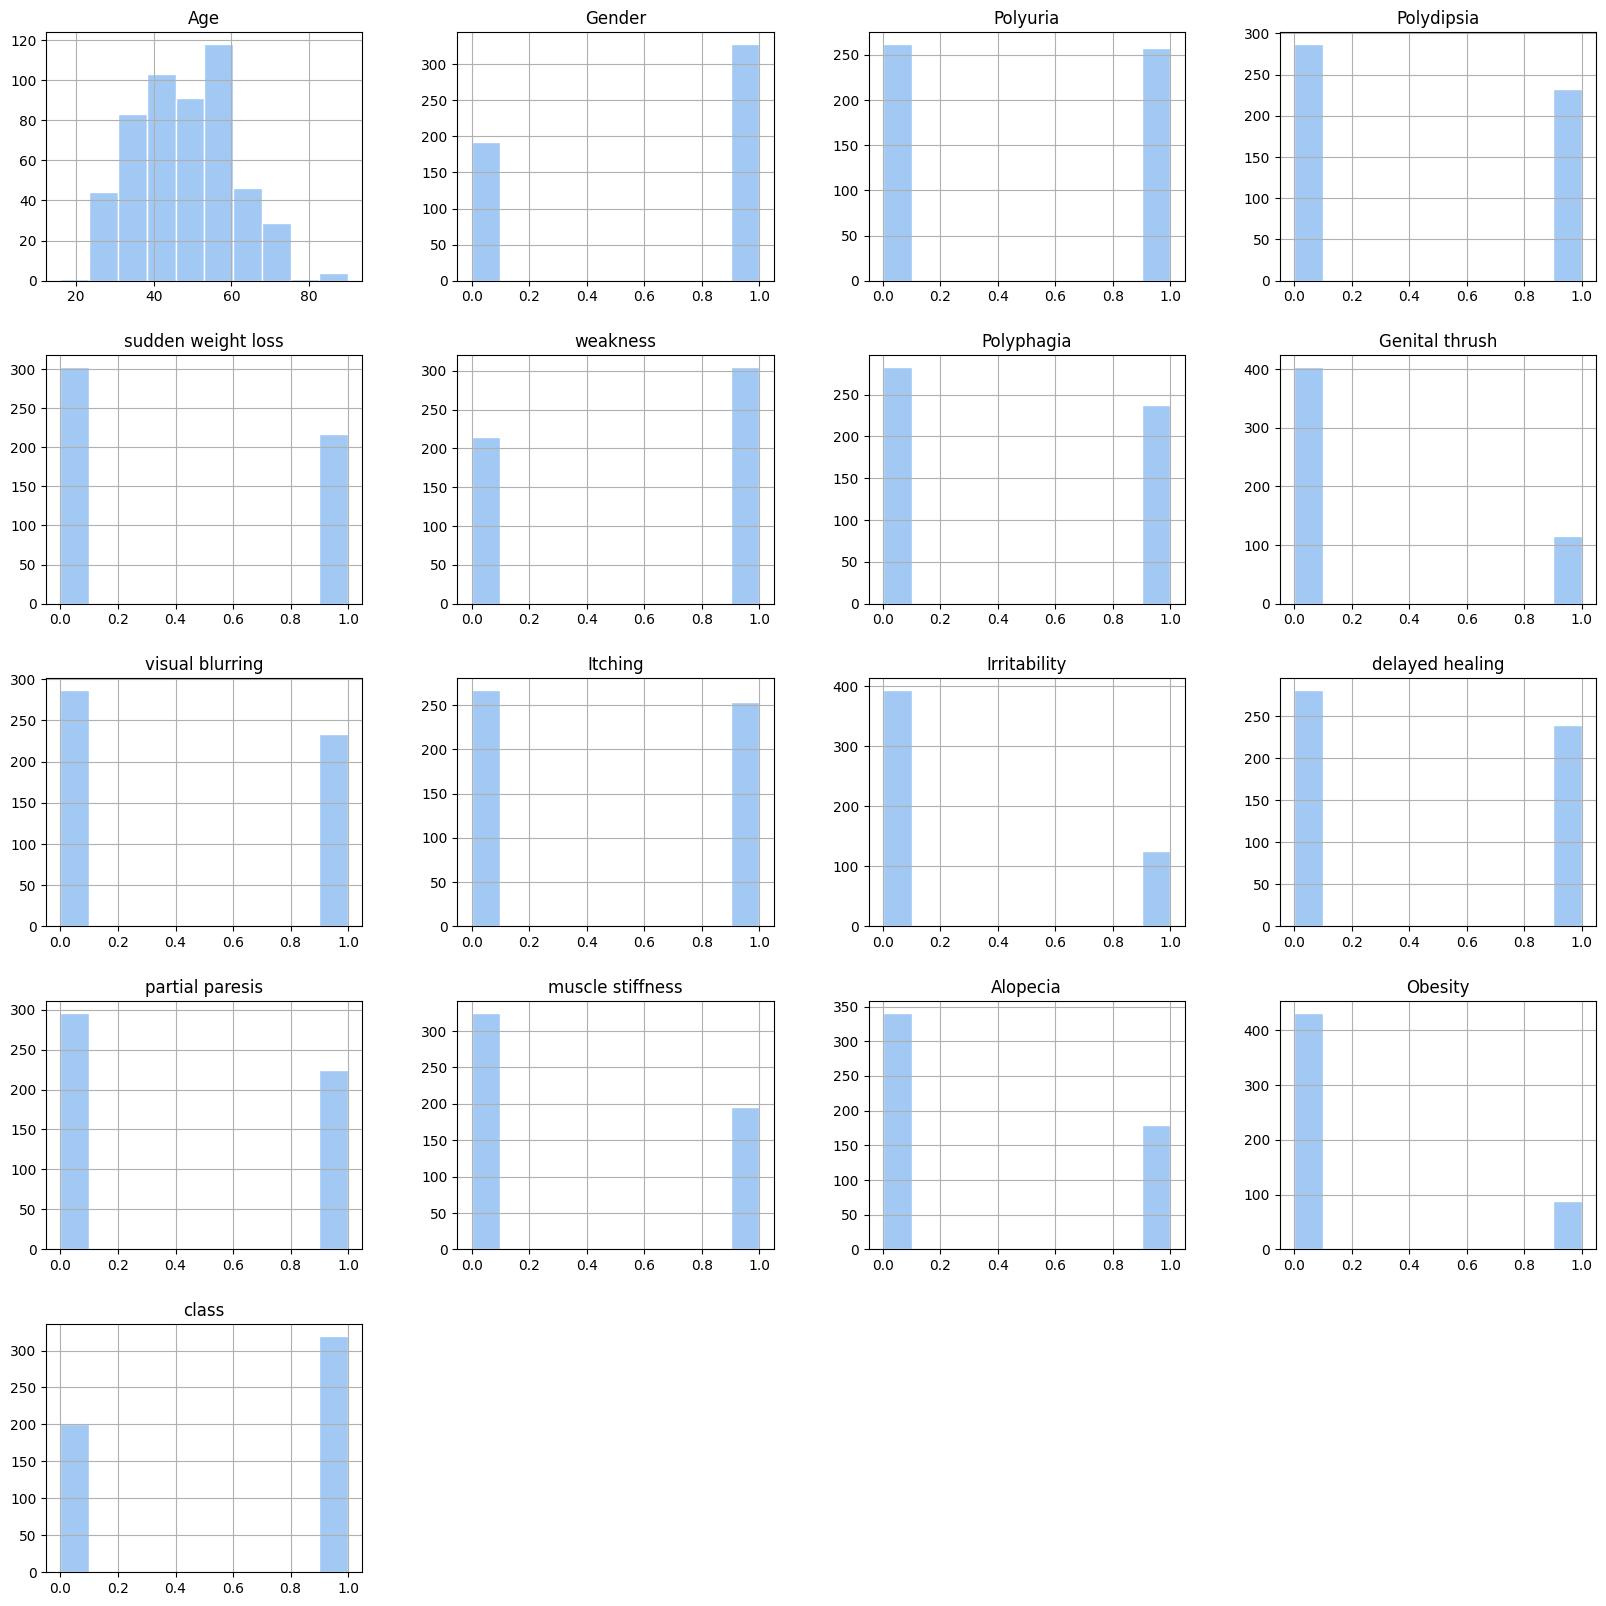

In [14]:
p = df_copy.hist(figsize = (20,20),edgecolor='white')

In [15]:
plt.figure(figsize=(15, 15),dpi=600)
sns.heatmap(df_copy.corr(),cmap='Oranges', annot = True)
plt.show()

### Splitting The Dataset

In [16]:
X = df_copy.drop(['class'],axis =1)
y = df_copy['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

dump(sc,open('scalar.pkl','wb'))

### Comparing The Models

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class="auto")
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_lr_pred)
print("Accuracy:", lr_accuracy)
cm_lr = confusion_matrix(y_test, y_lr_pred)
print(cm_lr)

Accuracy: 0.9326923076923077
[[29  4]
 [ 3 68]]


In [20]:
lr_precision = precision_score(y_test, y_lr_pred)
lr_recall = recall_score(y_test, y_lr_pred)
lr_f1score = f1_score(y_test,y_lr_pred)

print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1score)

Precision: 0.9444444444444444
Recall: 0.9577464788732394
F1 Score: 0.951048951048951


In [21]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.94      0.96      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.92      0.92       104
weighted avg       0.93      0.93      0.93       104



#### Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_gnb_pred)
print("Accuracy:", gnb_accuracy)
cm_nb = confusion_matrix(y_test, y_gnb_pred)
print(cm_nb)

Accuracy: 0.9038461538461539
[[28  5]
 [ 5 66]]


In [23]:
gnb_precision = precision_score(y_test, y_gnb_pred)
gnb_recall = recall_score(y_test, y_gnb_pred)
gnb_f1score = f1_score(y_test, y_gnb_pred)

print("Precision:", gnb_precision)
print("Recall:", gnb_recall)
print("F1 Score:", gnb_f1score)

Precision: 0.9295774647887324
Recall: 0.9295774647887324
F1 Score: 0.9295774647887324


In [24]:
report = classification_report(y_test, y_gnb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.93      0.93      0.93        71

    accuracy                           0.90       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.90      0.90      0.90       104



#### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=20)  
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_dt_pred)
print("Accuracy:", dt_accuracy)
cm_dt = confusion_matrix(y_test, y_dt_pred)
print(cm_dt)

Accuracy: 0.9230769230769231
[[30  3]
 [ 5 66]]


In [26]:
dt_precision = precision_score(y_test, y_dt_pred)
dt_recall = recall_score(y_test, y_dt_pred)
dt_f1score = f1_score(y_test, y_dt_pred)

print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1score)

Precision: 0.9565217391304348
Recall: 0.9295774647887324
F1 Score: 0.9428571428571428


In [27]:
report = classification_report(y_test, y_dt_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.96      0.93      0.94        71

    accuracy                           0.92       104
   macro avg       0.91      0.92      0.91       104
weighted avg       0.92      0.92      0.92       104



#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40, max_depth=4)
rf.fit(X_train,y_train)
y_rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("Accuracy:", rf_accuracy)
cm_rf = confusion_matrix(y_test, y_rf_pred)
print(cm_rf)

Accuracy: 0.9423076923076923
[[29  4]
 [ 2 69]]


In [29]:
rf_precision = precision_score(y_test, y_rf_pred)
rf_recall = recall_score(y_test, y_rf_pred)
rf_f1score = f1_score(y_test, y_rf_pred)

print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1score)

Precision: 0.9452054794520548
Recall: 0.971830985915493
F1 Score: 0.9583333333333334


In [30]:
report = classification_report(y_test, y_rf_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.95      0.97      0.96        71

    accuracy                           0.94       104
   macro avg       0.94      0.93      0.93       104
weighted avg       0.94      0.94      0.94       104



#### ANN

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [32]:
def def_model():
    model = Sequential([
        Dense(20, input_dim=16, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    return model

model = def_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 dense_1 (Dense)             (None, 32)                672       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,685
Trainable params: 1,685
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_history = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid), batch_size=20)

Epoch 1/25
17/17 [==============================] - 2s 21ms/step - loss: 0.6376 - accuracy: 0.5964 - val_loss: 0.5668 - val_accuracy: 0.6429
Epoch 2/25
17/17 [==============================] - 0s 4ms/step - loss: 0.5441 - accuracy: 0.5934 - val_loss: 0.4841 - val_accuracy: 0.6905
Epoch 3/25
17/17 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.6777 - val_loss: 0.4197 - val_accuracy: 0.7500
Epoch 4/25
17/17 [==============================] - 0s 4ms/step - loss: 0.4004 - accuracy: 0.8072 - val_loss: 0.3650 - val_accuracy: 0.8690
Epoch 5/25
17/17 [==============================] - 0s 4ms/step - loss: 0.3376 - accuracy: 0.9036 - val_loss: 0.3186 - val_accuracy: 0.8810
Epoch 6/25
17/17 [==============================] - 0s 5ms/step - loss: 0.2855 - accuracy: 0.9157 - val_loss: 0.2846 - val_accuracy: 0.8571
Epoch 7/25
17/17 [==============================] - 0s 5ms/step - loss: 0.2367 - accuracy: 0.9217 - val_loss: 0.2614 - val_accuracy: 0.8810
Epoch 8/25
17/17 [=

In [34]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


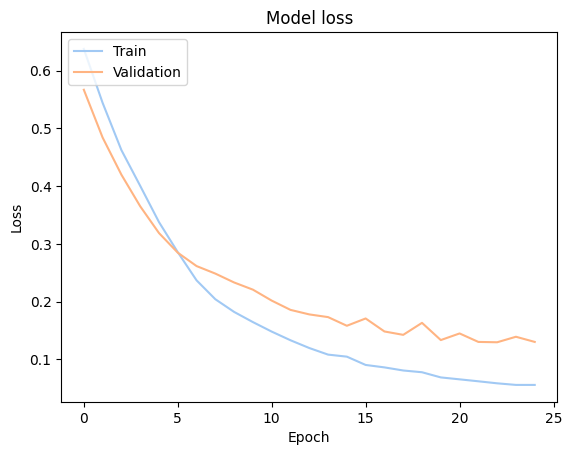

In [35]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

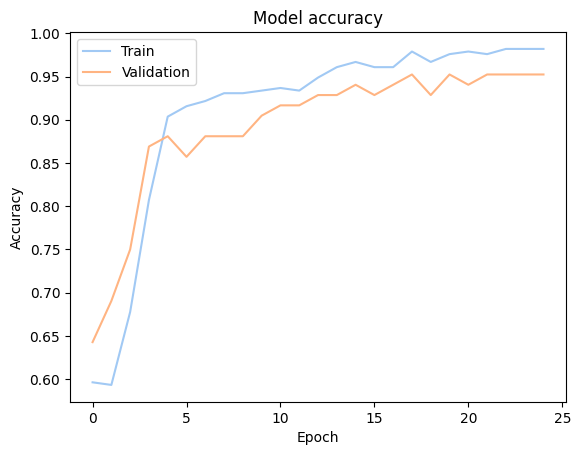

In [36]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
model.evaluate(X_test,y_test,batch_size=20)

6/6 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.9615


[0.08675473183393478, 0.9615384340286255]

In [38]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
ann_accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy:",ann_accuracy)

4/4 [==============================] - 0s 2ms/step
Test Accuracy: 0.9615384615384616


In [39]:
ann_precision = precision_score(y_test, y_pred)
ann_recall = recall_score(y_test, y_pred)
ann_f1score = f1_score(y_test, y_pred)

print("Precision:", ann_precision)
print("Recall:", ann_recall)
print("F1 Score:", ann_f1score)

Precision: 0.9855072463768116
Recall: 0.9577464788732394
F1 Score: 0.9714285714285714


In [40]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.99      0.96      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



In [41]:
cm_nn = confusion_matrix(y_test, y_pred)
print(cm_nn)
print(accuracy_score(y_test, y_pred))

[[32  1]
 [ 3 68]]
0.9615384615384616


### Confusion Matrices

##### LR Confusion Matrix

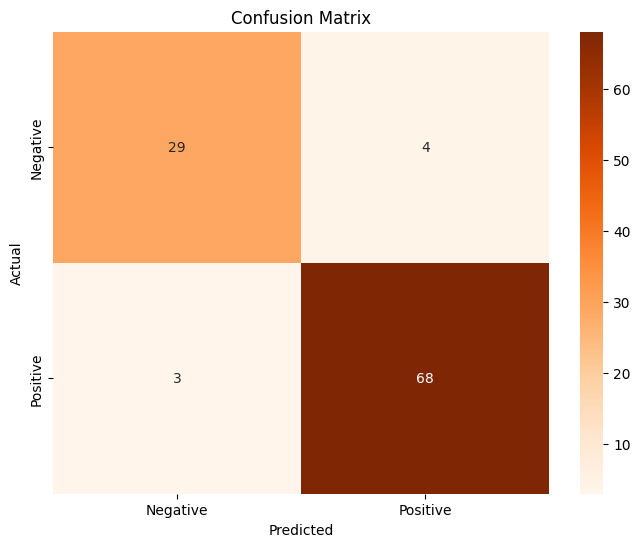

In [42]:
cm_lr = pd.DataFrame(cm_lr, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.yticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.show()

##### Naive Bayes Confusion Matrix

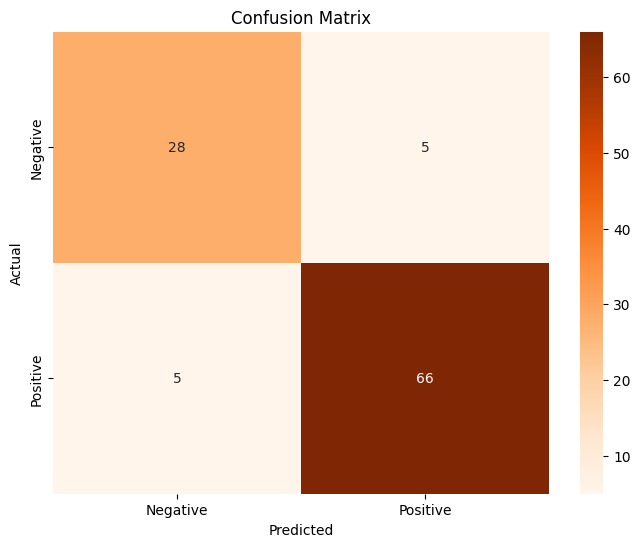

In [43]:
cm_nb = pd.DataFrame(cm_nb, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.yticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.show()

##### Decision Tree Confusion Matrix

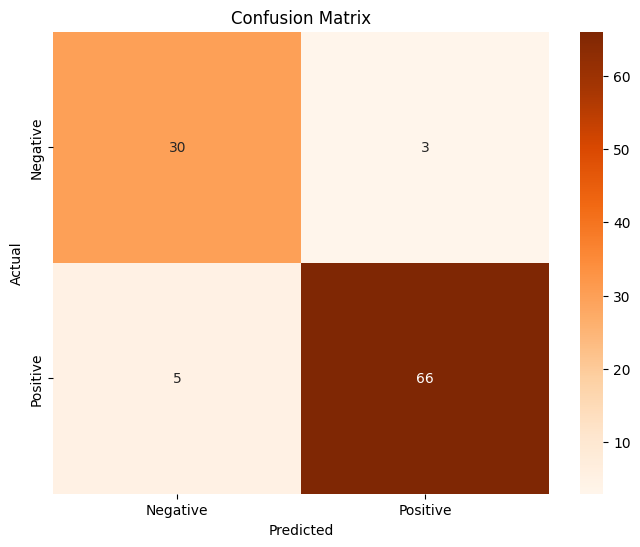

In [44]:
cm_dt = pd.DataFrame(cm_dt, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.yticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.show()

##### Random Forest Confusion Tree

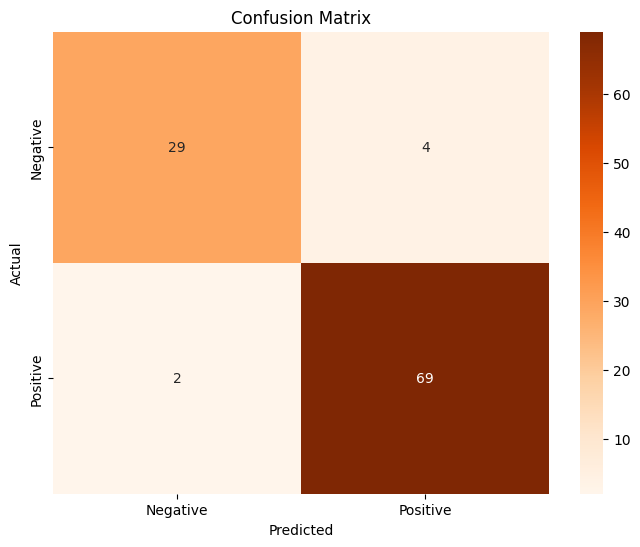

In [45]:
cm_rf = pd.DataFrame(cm_rf, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.yticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.show()

##### Artificial Neural Network Confusion Matrix

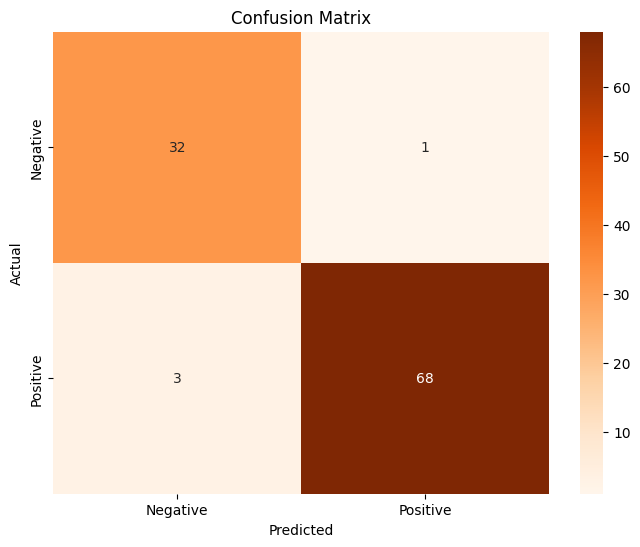

In [46]:
cm_nn = pd.DataFrame(cm_nn, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.yticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.show()

### Comparision Graph

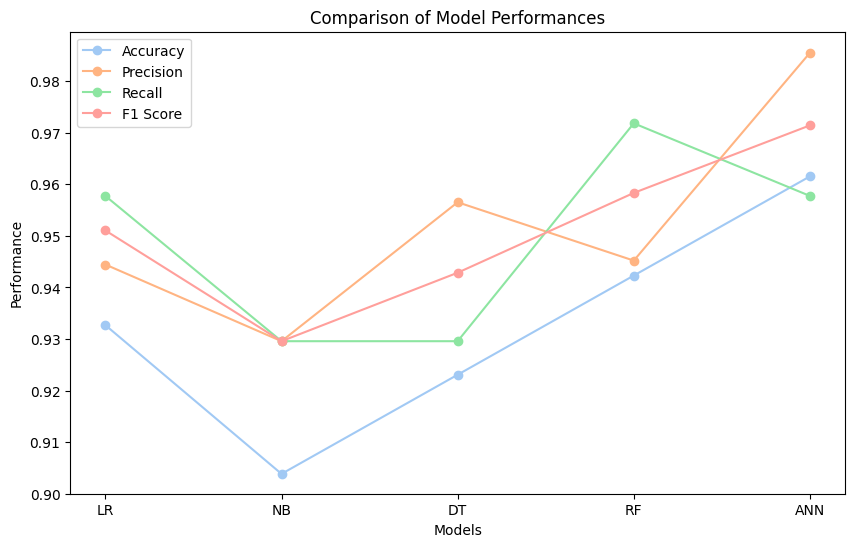

In [51]:
models = ['LR', 'NB', 'DT', 'RF', 'ANN']
maccuracy = [lr_accuracy, gnb_accuracy, dt_accuracy, rf_accuracy, ann_accuracy ]
mprecision = [lr_precision,gnb_precision,dt_precision,rf_precision,ann_precision]
mrecall = [lr_recall,gnb_recall,dt_recall,rf_recall,ann_recall]
mf1_score = [lr_f1score,gnb_precision,dt_f1score,rf_f1score,ann_f1score]
plt.figure(figsize=(10,6))
plt.plot(models, maccuracy, marker='o', label='Accuracy')
plt.plot(models, mprecision, marker='o', label='Precision')
plt.plot(models, mrecall, marker='o', label='Recall')
plt.plot(models, mf1_score, marker='o', label='F1 Score')
plt.ylim(0.90, None)
plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Comparison of Model Performances')
plt.legend()
plt.show()

In [48]:
from tabulate import tabulate

models = ['LR', 'NB', 'DT', 'RF', 'ANN']
taccuracy = [lr_accuracy, gnb_accuracy, dt_accuracy, rf_accuracy, ann_accuracy ]
tprecision = [lr_precision,gnb_precision,dt_precision,rf_precision,ann_precision]
trecall = [lr_recall,gnb_recall,dt_recall,rf_recall,ann_recall]
tf1_score = [lr_f1score,gnb_precision,dt_f1score,rf_f1score,ann_f1score]

table_data = []
for i in range(len(models)):
    table_data.append([models[i], taccuracy[i], tprecision[i], trecall[i], tf1_score[i]])

headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+------------+-------------+----------+------------+
| Model   |   Accuracy |   Precision |   Recall |   F1 Score |
+=========+============+=============+==========+============+
| LR      |   0.932692 |    0.944444 | 0.957746 |   0.951049 |
+---------+------------+-------------+----------+------------+
| NB      |   0.903846 |    0.929577 | 0.929577 |   0.929577 |
+---------+------------+-------------+----------+------------+
| DT      |   0.923077 |    0.956522 | 0.929577 |   0.942857 |
+---------+------------+-------------+----------+------------+
| RF      |   0.942308 |    0.945205 | 0.971831 |   0.958333 |
+---------+------------+-------------+----------+------------+
| ANN     |   0.961538 |    0.985507 | 0.957746 |   0.971429 |
+---------+------------+-------------+----------+------------+


### Saving The Best Model

In [49]:
#ANN 
model.save('model.h5')

In [52]:
input_data = (53,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0)
input_data1 = (38,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0)

input_data_reshaped = np.asarray(input_data).reshape(1,-1)
ip = sc.transform(input_data_reshaped)
prediction = model.predict(ip)

if (prediction[0] < 0.5):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

1/1 [==============================] - 0s 39ms/step
The person is not diabetic


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
